# Telecom Data Analysis

## Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
master_df = pd.read_csv("Teleco_Customer_Churn_Data_Complete.csv")

In [3]:
master_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## Basic Data Information

In [4]:
master_df.shape

(7043, 21)

In [5]:
master_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation** : *Total Charges should be in float instead of object* 

In [7]:
master_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

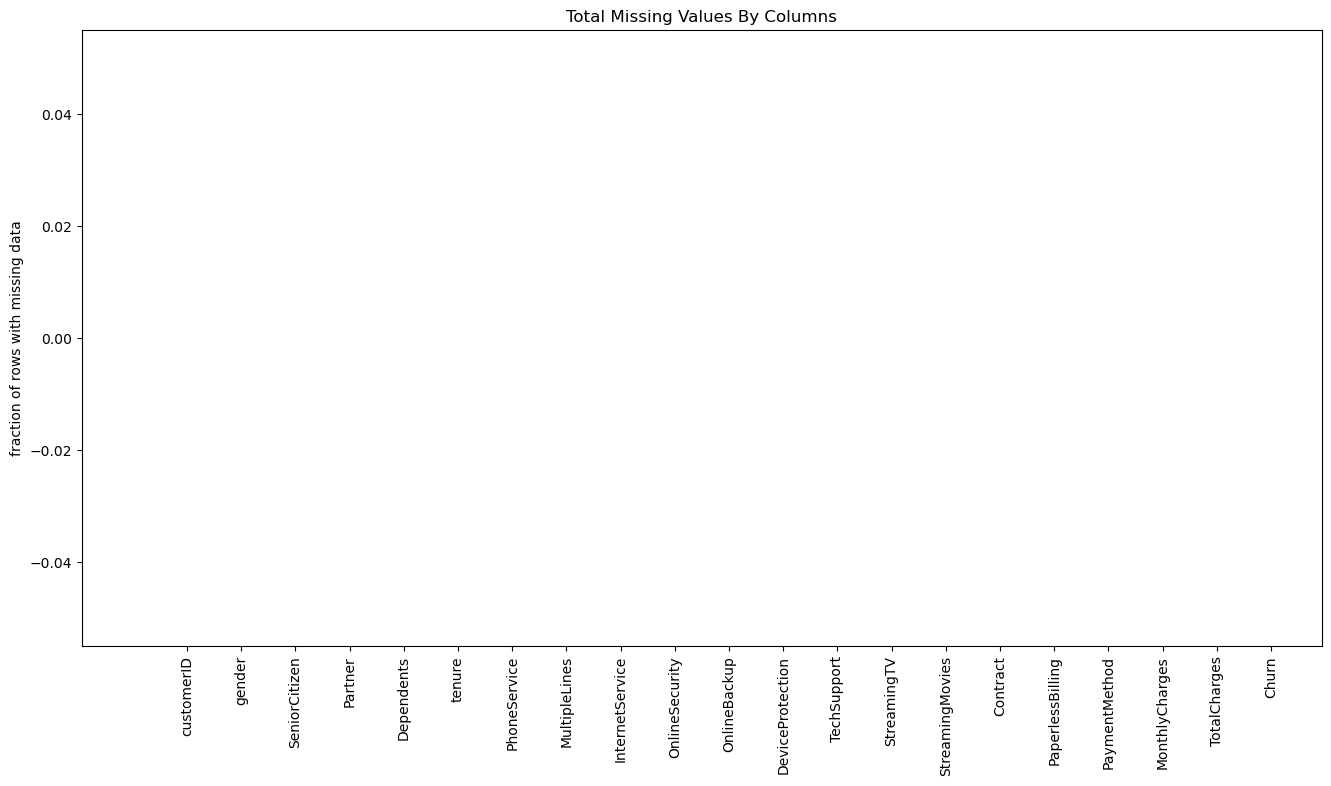

In [8]:
null_counts = master_df.isnull().sum()/len(master_df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.title("Total Missing Values By Columns")
plt.show()

**Observation** : *No missing values are observed* 

## Data Cleaning

In [9]:
master_df["TotalCharges"] = pd.to_numeric(master_df["TotalCharges"], errors="coerce")

In [10]:
master_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
master_df.dropna(how="any", inplace=True)

**Observation** : *Once the TotalCharges is converted to numeric format, some missing values can be observed. Though the value of missing quantity is negligible so the rows with missing values are removed and data is cleaned!* 

In [12]:
def calculate_equivalent_year(number_of_months):
  """Calculates the equivalent year from a number of months.

  Args:
    number_of_months: The number of months.

  Returns:
    The equivalent year.
  """

  years = number_of_months // 12
  months = number_of_months % 12

  return round(years + months / 12, ndigits=2)

In [13]:
master_df["tenure"]=calculate_equivalent_year(master_df["tenure"])

In [14]:
master_df.drop(columns="customerID", inplace=True)

## Univariate Data Analysis

<AxesSubplot:xlabel='tenure', ylabel='Count'>

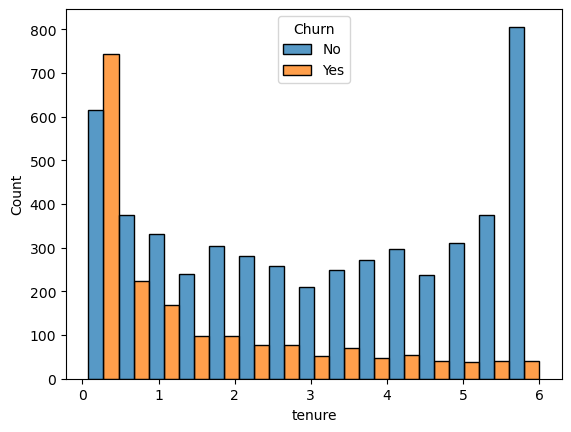

In [15]:
sns.histplot(data=master_df, x="tenure", hue="Churn", multiple="dodge")

**Observation** : *As tenure increases, churn count decreases* 

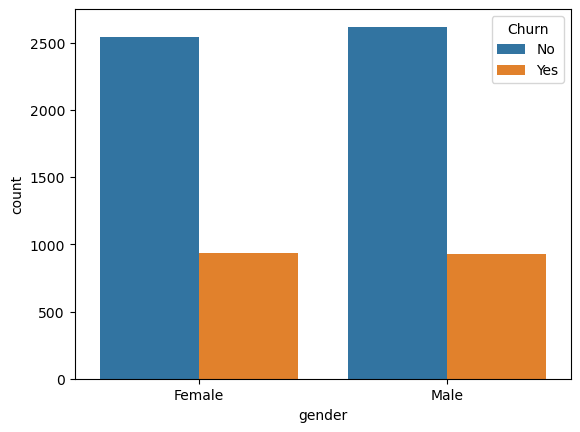

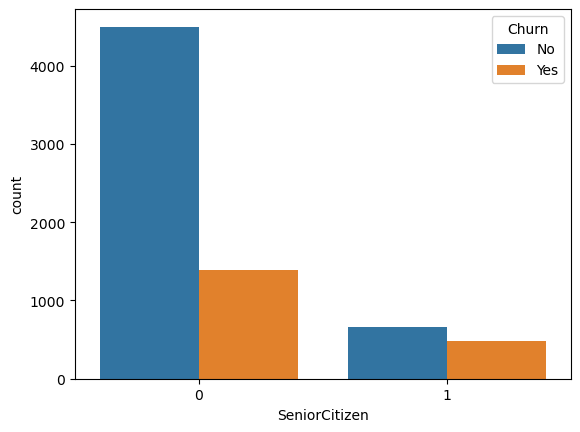

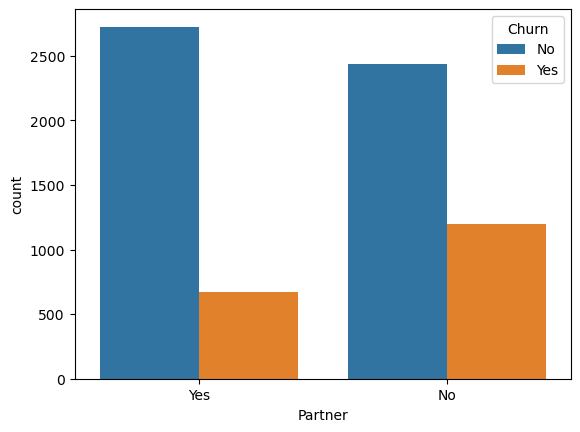

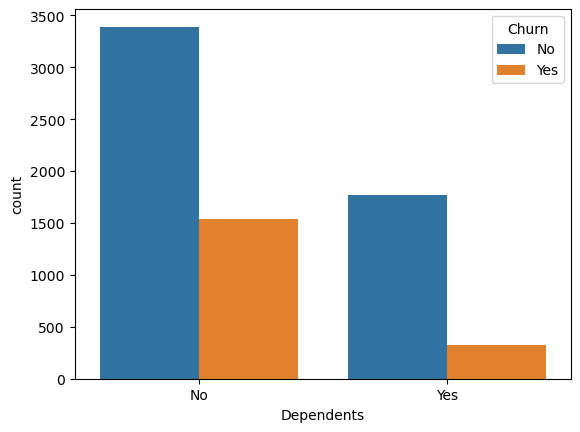

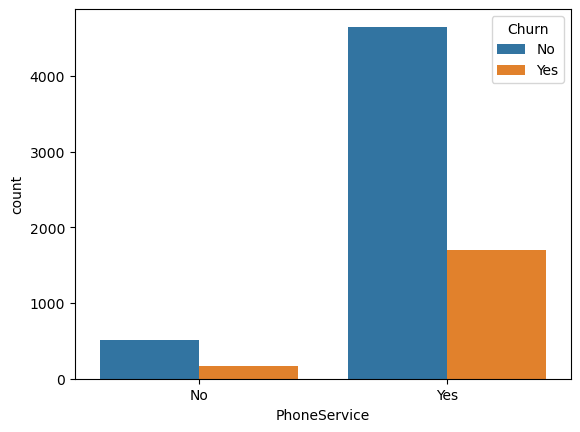

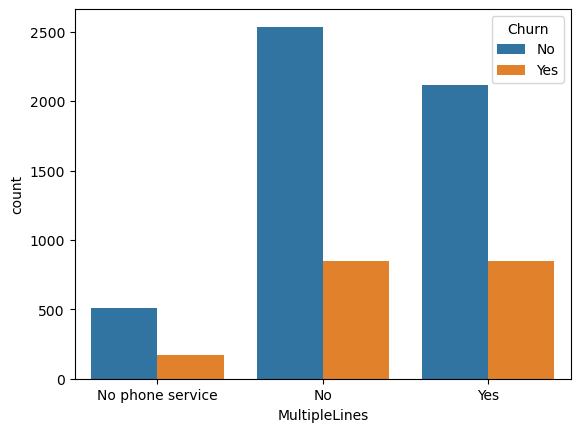

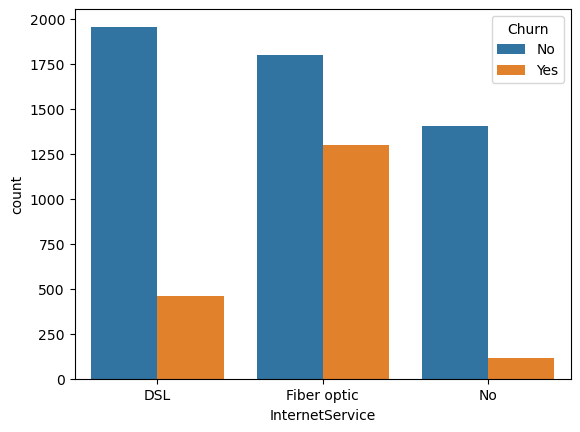

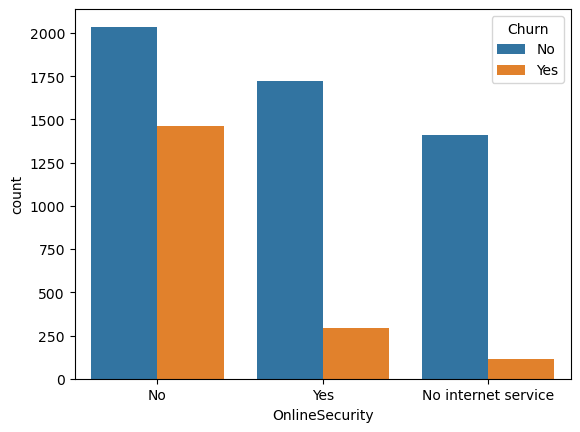

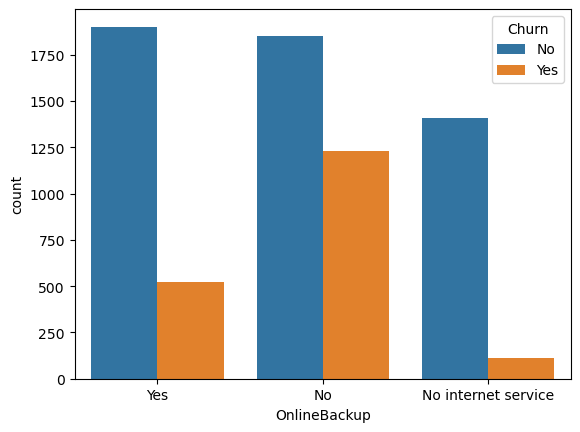

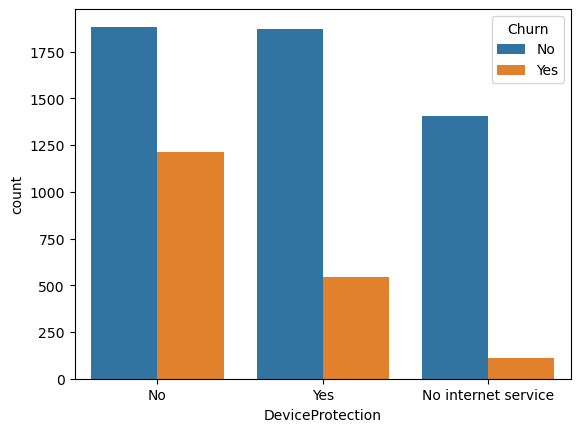

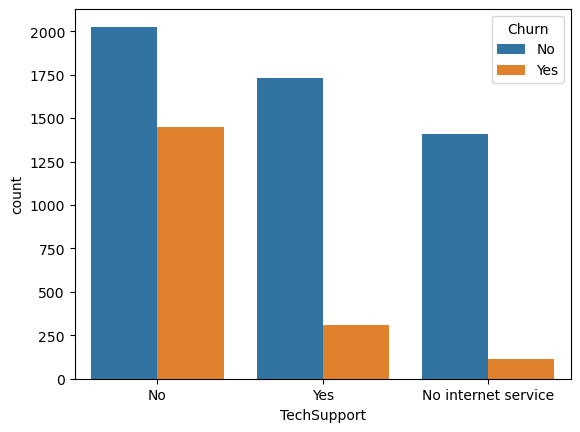

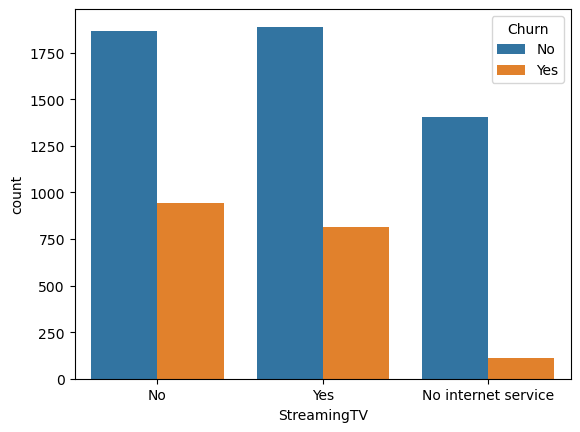

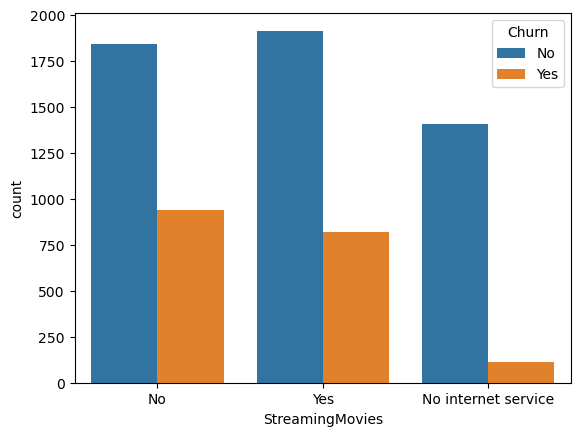

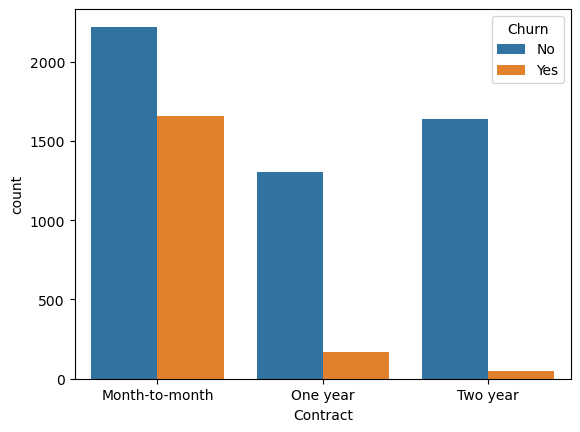

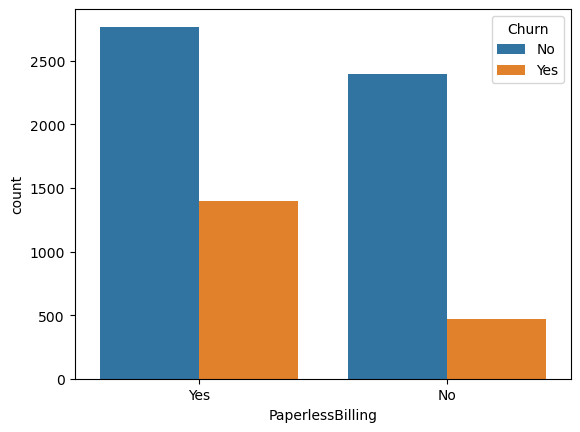

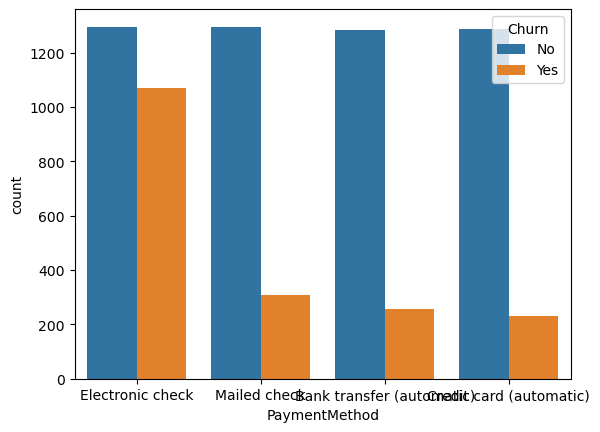

In [16]:
for i,predictor in enumerate(master_df.drop(columns=["Churn", "TotalCharges","MonthlyCharges","tenure"])):
    plt.figure(i)
    sns.countplot(data=master_df,x=predictor,hue="Churn")

**Observations**:
1.  *Gender doesn't affect the churn* 
2.  *Senior Citizens are more likely to churn* 
3.  *One with no partner or dependents are more likely to churn*
4.  *Customer having Fiber Optic (Internet Connection) are more likely to churn*
5.  *Customer with no online security or backup are more likely to churn* 
6.  *Customers with TechSupport and Device Protection are less likely to churn*
7.  *Customers have short-term (month-based) contract, paperless billing and electronic check as payment methods are more likely to churn*

## Bivariate Data Analysis

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

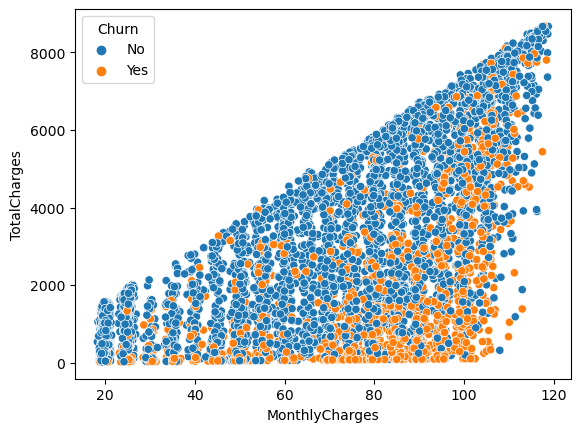

In [17]:
sns.scatterplot(data=master_df,x="MonthlyCharges", y="TotalCharges", hue="Churn")

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

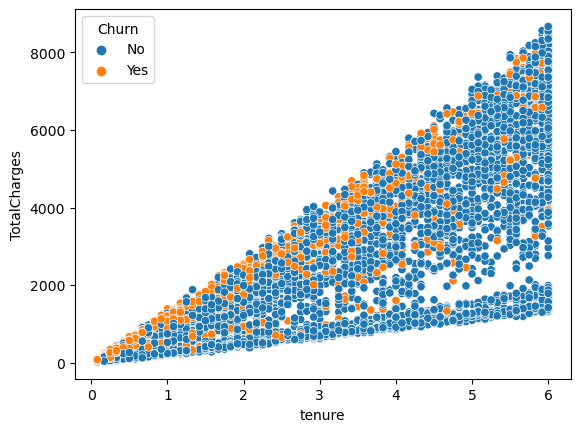

In [18]:
sns.scatterplot(data=master_df,x="tenure", y="TotalCharges", hue="Churn")

**Observations:**
1. *Total Bill Value increases proportionately with tenure.*
2. *Customers with higher Total Charges are more likely to churn over almost all tenure periods*
3. *Higher monthly charges tends to churn a customer.*

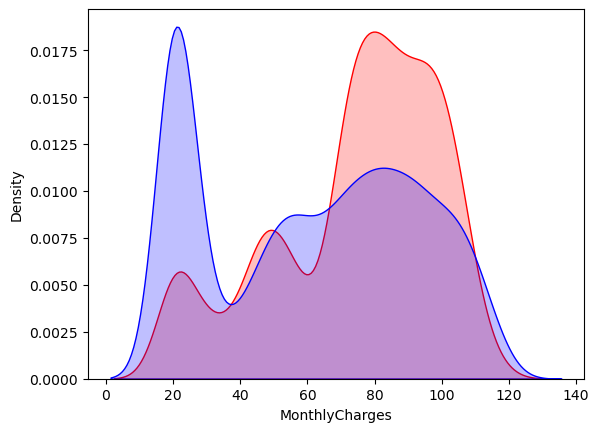

In [19]:
a = sns.kdeplot(x=master_df[master_df["Churn"] == "Yes"]["MonthlyCharges"], shade=True, color="Red")
a = sns.kdeplot(x=master_df[master_df["Churn"] == "No"]["MonthlyCharges"], shade=True, color="Blue")

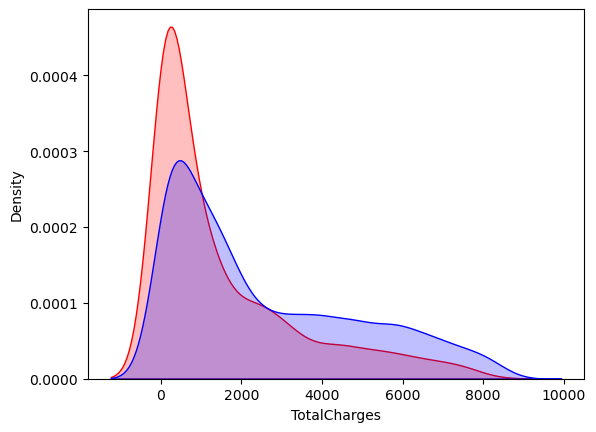

In [20]:
a = sns.kdeplot(x=master_df[master_df["Churn"] == "Yes"]["TotalCharges"], shade=True, color="Red")
a = sns.kdeplot(x=master_df[master_df["Churn"] == "No"]["TotalCharges"], shade=True, color="Blue")

**Observations:**
1. *Higher monthly charges leads to churning of a customer*
2. *A surprising insights are obtained that customer with lower total charges are more likely to churn, though by refering to previous scatterplot of TotalCharges Vs Tenure, The one with higher Total charges in initial stages of their lifecycle tends to churn*

In [21]:
master_df["Churn"] = np.where(master_df["Churn"] == "Yes", 1, 0)
master_df_dummy = pd.get_dummies(master_df, drop_first=True)

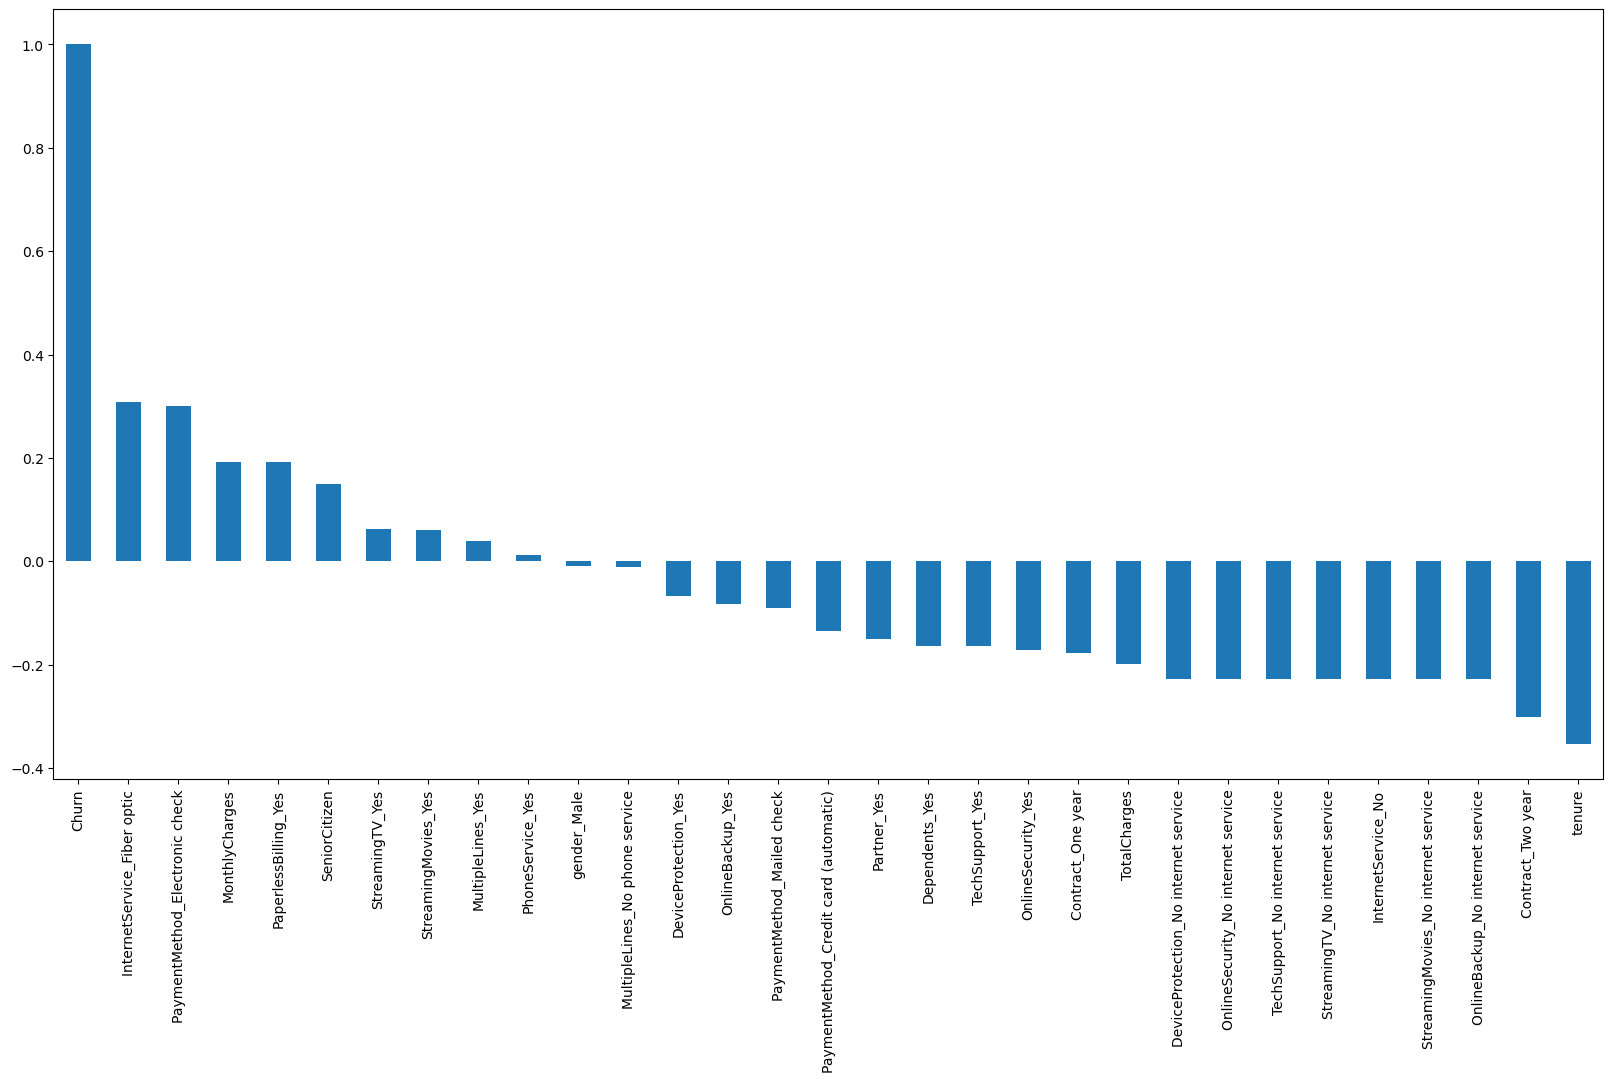

In [22]:
plt.figure(figsize=(20, 10))
master_df_dummy.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

**Observation:** *Any super strong correlation cannot be observed with any individual feature*